# Import Libraries

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Data

In [119]:
df = pd.read_csv("/content/players_20.csv")
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,...,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,...,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,...,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,...,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,...,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


# Feature Engineering

In [120]:
# extract players' names and cont. variables
df = df[['club', 'overall', 'potential', 'value_eur', 'wage_eur', 'international_reputation', 'weak_foot',
       'skill_moves', 'release_clause_eur', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']]

# replace null values with mean
df = df.fillna(df.mean())

df.head()

,club,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,FC Barcelona,94,94,95500000,565000,5,4,4,195800000.0,87.000000,92.000000,92.000000,96.000000,39.000000,66.000000,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,Juventus,93,93,58500000,405000,5,4,5,96500000.0,90.000000,93.000000,82.000000,89.000000,35.000000,78.000000,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,Paris Saint-Germain,92,92,105500000,290000,5,5,5,195200000.0,91.000000,85.000000,87.000000,95.000000,32.000000,58.000000,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,Atlético Madrid,91,93,77500000,125000,3,3,1,164700000.0,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678,87.000000,92.000000,78.000000,89.000000,52.000000,90.000000,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,Real Madrid,91,91,90000000,470000,4,4,4,184500000.0,91.000000,83.000000,86.000000,94.000000,35.000000,66.000000,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8


Select Top 4, Mid 4, and Bottom 4 Clubs in the Premiere League (based on 18-19 season)
- Top 4: Man city, Liverpool, Chelsea, Tottenham
- Mid 4: Leiceter, West Ham, Watford, Crystal Palace
- Bottom 4: Brighton & Hove Albion, Cardiff City, Fulham, Huddersfield Town

In [121]:
# selecting top 4, mid 4, and bottom 4 clubs
df_clubs = df[(df.club =='Manchester City') | (df.club =='Liverpool') | (df.club =='Chelsea') | (df.club == 'Tottenham Hotspur') |
              (df.club =='Leiceter City') | (df.club =='West Ham United') | (df.club =='Watford') | (df.club == 'Crystal Palace') |
              (df.club == 'Brighton & Hove Albion') |(df.club == 'Cardiff City') | (df.club == 'Fulham') | (df.club == 'Huddersfield Town')]

df_clubs.club.value_counts()

Tottenham Hotspur         33
Watford                   33
West Ham United           33
Manchester City           33
Brighton & Hove Albion    33
Liverpool                 33
Crystal Palace            33
Chelsea                   33
Huddersfield Town         30
Fulham                    30
Cardiff City              30
Name: club, dtype: int64

In [122]:
# categorizing by top 4, mid 4, and bottom 4
df_clubs.club = df_clubs.club.replace({'Manchester City':'top 4', 'Liverpool':'top 4', 'Chelsea':'top 4', 'Tottenham Hotspur':'top 4',
                                       'Leiceter City':'mid 4', 'West Ham United':'mid 4', 'Watford':'mid 4', 'Crystal Palace':'mid 4',
                                       'Brighton & Hove Albion':'bottom 4', 'Cardiff City':'bottom 4', 'Fulham':'bottom 4', 'Huddersfield Town':'bottom 4'})

df_clubs.club.value_counts()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


top 4       132
bottom 4    123
mid 4        99
Name: club, dtype: int64

# Train and Test Split

In [123]:
# X - all features except the club , y - clubs
X = df_clubs.iloc[:, 1:].values
y = df_clubs.club.values

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 1)

#Feature Scaling

In [125]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

# scale both the train and the test set
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Train using KNN

In [126]:
from sklearn.neighbors import KNeighborsClassifier

# train with k = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# get prediction
y_pred = knn.predict(X_test)

#Model Evaluation

In [127]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

print("-----------Confusion matrix-----------")
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
print("--------------------------------------")

print("\nTest set accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))

-----------Confusion matrix-----------
Predicted  bottom 4  mid 4  top 4  All
True                                  
bottom 4         14      6      2   22
mid 4            14     10      6   30
top 4             3      3     13   19
All              31     19     21   71
--------------------------------------

Test set accuracy: 0.52


# Finding The Optimal K Value

In [128]:
error = []

# Calculating error for K values between 1 and 50
for i in range(1, 75):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

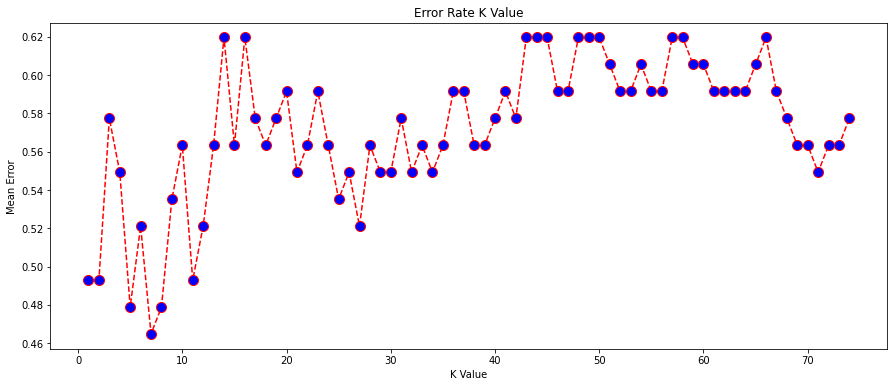

In [130]:
plt.figure(figsize=(15, 6))
plt.plot(range(1, 75), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# Try Using Less Features

In [132]:
df = pd.read_csv("/content/players_20.csv")

# extract players' names and some cont. variables
df = df[['club', 'overall', 'potential', 'value_eur', 'wage_eur', 'international_reputation']]

# replace null values with mean
df = df.fillna(df.mean())

df.head()

,club,overall,potential,value_eur,wage_eur,international_reputation
0,FC Barcelona,94,94,95500000,565000,5
1,Juventus,93,93,58500000,405000,5
2,Paris Saint-Germain,92,92,105500000,290000,5
3,Atlético Madrid,91,93,77500000,125000,3
4,Real Madrid,91,91,90000000,470000,4


In [133]:
# selecting top 4, mid 4, and bottom 4 clubs
df_clubs = df[(df.club =='Manchester City') | (df.club =='Liverpool') | (df.club =='Chelsea') | (df.club == 'Tottenham Hotspur') |
              (df.club =='Leiceter City') | (df.club =='West Ham United') | (df.club =='Watford') | (df.club == 'Crystal Palace') |
              (df.club == 'Brighton & Hove Albion') |(df.club == 'Cardiff City') | (df.club == 'Fulham') | (df.club == 'Huddersfield Town')]

# categorizing by top 4, mid 4, and bottom 4
df_clubs.club = df_clubs.club.replace({'Manchester City':'top 4', 'Liverpool':'top 4', 'Chelsea':'top 4', 'Tottenham Hotspur':'top 4',
                                       'Leiceter City':'mid 4', 'West Ham United':'mid 4', 'Watford':'mid 4', 'Crystal Palace':'mid 4',
                                       'Brighton & Hove Albion':'bottom 4', 'Cardiff City':'bottom 4', 'Fulham':'bottom 4', 'Huddersfield Town':'bottom 4'})

df_clubs.club.value_counts()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


top 4       132
bottom 4    123
mid 4        99
Name: club, dtype: int64

In [136]:
# X - all features except the club , y - clubs
X = df_clubs.iloc[:, 1:].values
y = df_clubs.club.values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

# scale both the train and the test set
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier

# train with k = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# get prediction
y_pred = knn.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

print("-----------Confusion matrix-----------")
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
print("--------------------------------------")

print("\nTest set accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))

-----------Confusion matrix-----------
Predicted  bottom 4  mid 4  top 4  All
True                                  
bottom 4         22      0      0   22
mid 4            11     10      9   30
top 4             4      2     13   19
All              37     12     22   71
--------------------------------------

Test set accuracy: 0.63


Text(0, 0.5, 'Mean Error')

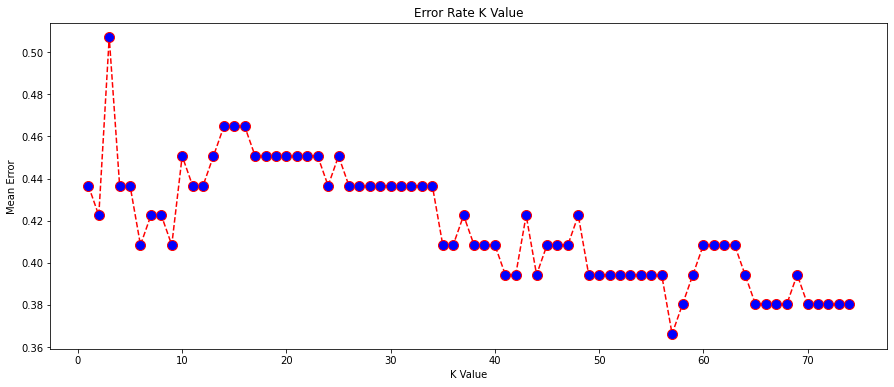

In [135]:
error = []

# Calculating error for K values between 1 and 75
for i in range(1, 75):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(15, 6))
plt.plot(range(1, 75), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
'''# 10 fold CV
acc = cross_val_score(knn, X_test, y_test, cv=10)
print("\n10-fold CV accuracy for each fold\n {}".format(acc))
print("\n--------------------------------------")
print("10-fold CV Average Accuracy: {:.2f}".format(acc.mean()))'''

'''# confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))'''